<a href="https://colab.research.google.com/github/radonys/EPL-Season-Analysis/blob/master/Football_Insights_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football Insights

### BUDT758X Course Project

#### Group 30 (Random_3 _Guys): Ajay Iyer, Mihir Wachasundar, Yash Srivastava

## Section 1: Project Overview

#### **Introduction**

This project shall focus on the English Premier League, the topmost football division in England. A concise summary of the league and the rules involved are as follows-

*   There are 20 teams in the league each season, out of which the teams that finish in the last 3 positions at the end of the season are relegated, to be replaced by the top 3 teams from the lower division for the forthcoming season (say, teams A, B, C are relegated in the 2007/08 season, teams X, Y, Z shall replace them from the lower league for the season 2008/09).
*   Each team names 11 players for every game and plays 38 games in a season, 19 of which are played at their home stadium and the remaining 19 away from home (at the opposition’s home).
*   Each win gets a team 3 points and a draw earns them 1 point; the team with the highest points total is crowned champions and all teams finishing in the top 4 get to play in the prestigious all-European UEFA Champions League (UCL).

#### **Objective**

The objective of the project here is to take a deep dive into the analytics involving the teams participating in the league in the 11 seasons from 2007/08 to 2017/18. As with any sport, a game of football can be looked at in multiple ways using numbers, both basic and advanced which tells us plenty about the performances of the teams, especially their style of play in general.

We shall be analyzing the attacking and defensive aspects of teams, check their over/under performance in terms of their goalscoring and eventually check whether the good teams are becoming better or if the lower level teams are becoming worse.

#### **Research Questions**

We shall be looking to answer these queries (updated from the proposal) pertaining to the nature of the league in general and the style/systems employed by the participating clubs -

1. Have the standards/performances of the top teams improved? In other words, are the top 4 teams in any particular season getting more points than what they used to over 10 years?

2. How has the required points total for survival/winning the league changed? Do teams need more points to either win the title or escape relegation or achieve UCL status?

3. Has the home team advantage increased/decreased over time? Do teams continue to secure more points at home than away? And how many goals does a team need to secure wins?

4. Has the nature of possession/passing changed? In other words, what does a team do with the ball? How do teams fare in terms of on-ball actions?

5. Are the teams efficient in terms of the offensive actions that they execute? Are teams getting more shots on target now than before or has the ratio has stayed the same more or less? And what is their success ratio over the years? Has the goal conversion rate (goals scored from shots) improved?

6. By what margins do teams usually win or lose on average? What is the variance for teams finishing in different positions?

7. Are good teams becoming better or are the bad ones becoming worse? Are the top 4 teams getting more points, scoring more and conceding fewer goals than they used to previously? Can we say the same about the poorly performing teams as well?

#### **Expected Findings**

- We expect the average possession percentages of top performing teams to see an increase over the years.
- The average on-ball statistics to be better for top performing teams than the lower level teams (indicating more effective use of the ball).
- Better teams to over-perform their attacking outputs than the poorer teams.
- Top teams to defend much better than the lower level teams (more disciplined approach).
- The amount of points won by top teams to have increased on average and conversely, the amount of points won by bottom teams to reduce (implying that good teams are becoming better while the poorer teams are becoming worse).
- We expect the home teams to have more favourable numbers in terms of goals needed to win games as compared to the away teams.

Based on these, our hypothesis is that top teams are more efficient with their decision making with the ball and more disciplined defensively as well, employing a sustainable strategy to score more goals and consequently, get more points, consequently improving as compared to the lower level teams. We shall try and see if we are correct.


## Python Modules

### Install

In [138]:
!pip install gdown

### Import

In [139]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly
import seaborn as sns
import warnings
import statistics
import plotly.graph_objects as go

%pylab inline
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Section 2: Data Acquisition

### Scrape

Our dataset has been acquired via scraping one of the well-known stats website (https://fbref.com/en/) and also by using two more datasets from Kaggle.

Data scraped from the site consists of seasonwise summary of in-game statistics such as offensive, defensive metrics and goalkeeping statistics, etc. They also contain a detailed overall summary of every season, such as total wins, draws, losses and points won by teams.

The data acquired from Kaggle consists of additional in-game statistics that we can then compile together with the scraped data. In addition to that, we also get the match results of every game for every season considered in our analysis, all of which we shall use for our analysis.

Below code scrapes data from seasons 2007-08 to 2017-18. The scraping code has been divided into the following sections:

- **Scrape Seasons**

  - In this code section, we scrape the required season links which contain the data for the given season and load it in a pandas dataframe.
  - We remove the season links which are not under consideration in the analysis.

- **Scrape Season Data**

  - In this code section, we collect per season data in a dataframe and store it in a dictionary against its season and finally convert the same into a DataFrame (Table 1)
  - Attributes like total matches, matches won/lost/drawn, goals scored, total points etc. have been collected.

#### Scrape Seasons

In [140]:
def scrape_seasons(url):

  seasons = requests.get(url)
  seasons_soup = BeautifulSoup(seasons.text, 'html.parser')
  season_years = [year.text for year in seasons_soup.find_all(name='th')]
  season_urls = ['https://fbref.com' + link.find('a').get('href') if link.find('a') else None for link in seasons_soup.find_all(name='th')]

  seasons = pd.DataFrame({'Season': season_years, 'URLs': season_urls})
  seasons.dropna(inplace=True)
  seasons.reset_index(inplace=True, drop=True)
  return seasons

seasons_url = "https://fbref.com/en/comps/9/history/Premier-League-Seasons"
seasons = scrape_seasons(seasons_url)
seasons.head()

,Season,URLs
0,2019-2020,https://fbref.com/en/comps/9/Premier-League-Stats
1,2018-2019,https://fbref.com/en/comps/9/1889/2018-2019-Pr...
2,2017-2018,https://fbref.com/en/comps/9/1631/2017-2018-Pr...
3,2016-2017,https://fbref.com/en/comps/9/1526/2016-2017-Pr...
4,2015-2016,https://fbref.com/en/comps/9/1467/2015-2016-Pr...


In [141]:
#Take seasons from 2007-08 to 2017-18

seasons.drop(seasons.index[13:], inplace=True)
seasons.drop(seasons.index[0:2], inplace=True)
seasons.set_index('Season', inplace=True)
seasons

,URLs
Season,
2017-2018,https://fbref.com/en/comps/9/1631/2017-2018-Pr...
2016-2017,https://fbref.com/en/comps/9/1526/2016-2017-Pr...
2015-2016,https://fbref.com/en/comps/9/1467/2015-2016-Pr...
2014-2015,https://fbref.com/en/comps/9/733/2014-2015-Pre...
2013-2014,https://fbref.com/en/comps/9/669/2013-2014-Pre...
2012-2013,https://fbref.com/en/comps/9/602/2012-2013-Pre...
2011-2012,https://fbref.com/en/comps/9/534/2011-2012-Pre...
2010-2011,https://fbref.com/en/comps/9/467/2010-2011-Pre...
2009-2010,https://fbref.com/en/comps/9/400/2009-2010-Pre...


#### Scrape Season Data - Table 1

In [0]:
def scrape_season(url):

  season_data = pd.read_html(url)
  season_data = season_data[0]
  
  return season_data

season_data = dict()

for index, season in enumerate(seasons.index):
  
  season_data[season] = scrape_season(seasons['URLs'][index])
  time.sleep(0.5)

In [143]:
season_data_concat = pd.concat(season_data.values(), keys=season_data.keys())
season_data_concat

Attendance   D  GA  GDiff   GF  ...   W    xG   xGA xGDiff  xGDiff/90
2017-2018 0        54070   4  27     79  106  ...  32  83.5  24.5   59.0       1.55
          1        74976   6  28     40   68  ...  25  56.7  37.4   19.3       0.51
          2        67953   8  36     38   74  ...  23  66.4  32.1   34.3       0.90
          3        53049  12  38     46   84  ...  21  69.6  33.7   35.9       0.94
          4        41282   7  38     24   62  ...  21  55.8  35.0   20.8       0.55
...                  ...  ..  ..    ...  ...  ...  ..   ...   ...    ...        ...
2007-2008 15       20746  10  54    -18   36  ...   9   NaN   NaN    NaN        NaN
          16       23773  12  60    -22   38  ...   8   NaN   NaN    NaN        NaN
          17       23585   6  66    -25   41  ...  10   NaN   NaN    NaN        NaN
          18       26181  11  62    -16   46  ...   8   NaN   NaN    NaN        NaN
          19       32432   8  89    -69   20  ...   1   NaN   NaN    NaN        NaN

[220 rows x 18 columns]

### Existing Data

The data below has been taken from Kaggle Data Source ([EPL Data](https://www.kaggle.com/zaeemnalla/premier-league)) in order to get additional statistics on offensive/defensive actions to improve our analysis.

The season-wise statistics have been stored in Table 2, whereas the game results for every season are stored in Table 3.

#### Table 2

In [144]:
!gdown https://drive.google.com/uc?id=0BzS4fr5LirGwY0xnYlVpYWpVVG43N0U1bDNzVHZ0RFpDVjJV

Downloading...
From: https://drive.google.com/uc?id=0BzS4fr5LirGwY0xnYlVpYWpVVG43N0U1bDNzVHZ0RFpDVjJV
To: /content/stats.csv
100% 55.2k/55.2k [00:00<00:00, 48.1MB/s]


In [145]:
season_off_def_stats = pd.read_csv('stats.csv')
season_off_def_stats

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,saves,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,head_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_through_ball,total_long_balls,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,5.0,1.0,72.0,11.0,9.0,80.0,16.0,27.0,2.0,81.0,254.0,890.0,1.0,1222.0,NaN,1.0,5.0,3.0,18723.0,NaN,2397.0,NaN,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,3.0,6.0,41.0,23.0,6.0,127.0,22.0,24.0,4.0,74.0,292.0,982.0,0.0,1206.0,NaN,1.0,3.0,2.0,16759.0,NaN,2270.0,NaN,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,6.0,1.0,46.0,11.0,3.0,120.0,20.0,27.0,1.0,65.0,246.0,969.0,2.0,1115.0,NaN,0.0,1.0,1.0,17154.0,NaN,2800.0,NaN,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,10.0,3.0,53.0,10.0,7.0,111.0,12.0,35.0,6.0,73.0,214.0,998.0,1.0,1202.0,NaN,1.0,3.0,3.0,18458.0,NaN,2045.0,NaN,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,6.0,2.0,44.0,13.0,9.0,149.0,6.0,54.0,11.0,128.0,276.0,995.0,2.0,1412.0,NaN,2.0,7.0,6.0,14914.0,NaN,2408.0,NaN,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,2.0,0.0,27.0,1.0,2.0,67.0,10.0,58.0,103.0,118.0,519.0,744.0,4.0,1070.0,490.0,1.0,6.0,4.0,14960.0,26.0,2563.0,2267.0,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,1.0,0.0,24.0,4.0,0.0,38.0,9.0,56.0,137.0,124.0,390.0,610.0,2.0,943.0,499.0,2.0,7.0,3.0,15721.0,23.0,2580.0,2582.0,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,3.0,1.0,34.0,3.0,2.0,73.0,8.0,56.0,110.0,128.0,462.0,658.0,4.0,953.0,509.0,1.0,2.0,1.0,17174.0,56.0,2541.0,2589.0,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,0.0,1.0,28.0,8.0,2.0,87.0,6.0,68.0,152.0,142.0,461.0,678.0,9.0,1164.0,609.0,2.0,5.0,5.0,12892.0,33.0,2528.0,1979.0,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018


#### Table 3

In [146]:
!gdown 'https://drive.google.com/uc?id=0BzS4fr5LirGweGZrZ3JwRGk0aWFWTkUwa2tJSkcwZjdscTRZ'

Downloading...
From: https://drive.google.com/uc?id=0BzS4fr5LirGweGZrZ3JwRGk0aWFWTkUwa2tJSkcwZjdscTRZ
To: /content/results.csv
100% 213k/213k [00:00<00:00, 77.8MB/s]


In [147]:
season_results_data = pd.read_csv('results.csv')
season_results_data

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007
...,...,...,...,...,...,...
4555,Newcastle United,Chelsea,3.0,0.0,H,2017-2018
4556,Southampton,Manchester City,0.0,1.0,A,2017-2018
4557,Swansea City,Stoke City,1.0,2.0,A,2017-2018
4558,Tottenham Hotspur,Leicester City,5.0,4.0,H,2017-2018


## Section 3: Data Cleaning and Processing

### Remove not-required data

We start by dropping the columns from all three tables that are not required in our analysis.

#### Table 1

In [0]:
del season_data_concat['Attendance']
del season_data_concat['Goalkeeper']
del season_data_concat['Notes']
del season_data_concat['Top Team Scorer']
del season_data_concat['Rk']

#### Table 2

In [0]:
season_off_def_stats.drop(columns=['team', 'wins', 'losses', 'goals', 'hit_woodwork', 'total_offside', 'goals_conceded', 'last_man_tackle', 'backward_pass', 'touches', 'pen_goals_conceded', 'clearance_off_line'], inplace=True)

#### Table 3

In [0]:
season_results_data = season_results_data[season_results_data['season'] != '2006-2007']
season_results_data.reset_index(drop=True, inplace=True)

### Reorder Columns

We order the columns in our preferred format, that is, to couple all offensive statistics together and the defensive statistics together.

#### Table 1

In [0]:
season_data_concat = season_data_concat[['Squad', 'MP', 'W', 'D', 'L', 'Pts', 'GF', 'GA', 'GDiff', 'xG', 'xGA', 'xGDiff', 'xGDiff/90']]

#### Table 2

In [0]:
season_off_def_stats = season_off_def_stats[['season', 'total_pass', 'total_long_balls', 'total_cross', 'total_through_ball', 'corner_taken', 'total_scoring_att', 'ontarget_scoring_att', 'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal', 'att_obox_goal', 'goal_fastbreak', 'big_chance_missed', 'dispossessed', 'total_tackle', 'outfielder_block', 'interception', 'total_clearance', 'head_clearance', 'penalty_conceded', 'own_goals', 'total_yel_card', 'total_red_card', 'clean_sheet', 'saves', 'penalty_save', 'total_high_claim', 'punches']]

### Re-Indexing Data

We re-index both datasets, using a multi-index of season and rank of every team.

#### Table 1

In [0]:
seasons_list = list(seasons.index)
ranks_list = [i for i in range(1, 21)]
indexes = pd.MultiIndex.from_product([seasons_list, ranks_list])
season_data_concat.index = indexes

#### Table 2

In [0]:
season_off_def_stats['Rank'] = season_off_def_stats.index%20+1
season_off_def_stats.set_index(['season', 'Rank'], drop=True, inplace=True)

### Merge Tables

Finally, after executing several data processing activities, we can now merge both Tables 1 and 2 together by matching their indices. This table shall be a comprehensive collection of all required data of all teams for the 11 seasons between 2007-08 to 2017-18.

#### Table 1 & Table 2 - Table 4

In [155]:
epl_seasons_data = season_data_concat.merge(season_off_def_stats, right_on=season_off_def_stats.index, left_on=season_data_concat.index)
epl_seasons_data['Season'] = [key[0] for key in epl_seasons_data['key_0']]
epl_seasons_data['Rank'] = [key[1] for key in epl_seasons_data['key_0']]
epl_seasons_data.set_index(['Season', 'Rank'], inplace=True)
epl_seasons_data.drop(columns=['key_0'], inplace=True)
epl_seasons_data

Squad  MP  ...  total_high_claim  punches
Season    Rank                       ...                           
2017-2018 1     Manchester City  38  ...              21.0     15.0
          2      Manchester Utd  38  ...              20.0      6.0
          3           Tottenham  38  ...              20.0     21.0
          4           Liverpool  38  ...              27.0     12.0
          5             Chelsea  38  ...              25.0     20.0
...                         ...  ..  ...               ...      ...
2007-2008 16             Bolton  38  ...              68.0     14.0
          17             Fulham  38  ...              47.0     20.0
          18            Reading  38  ...              77.0     11.0
          19    Birmingham City  38  ...              55.0     27.0
          20       Derby County  38  ...              68.0     24.0

[220 rows x 42 columns]

### Rename Columns

We can now rename the column names of the final consolidated table for better understanding and readability.

#### Table 3

In [0]:
season_results_data.columns = ['Home Team', 'Away Team', 'Home Goals', 'Away Goals', 'Result', 'Season']

#### Table 4

In [157]:
epl_seasons_data.columns = ['Team', 'Matches', 'Wins', 'Draws', 'Losses', 'Points', 'Goals scored', 'Goals conceded', 'Goal difference', 'Expected goals (xG)', 'Expected goals against (xGA)', 'Expected goal difference (xGDiff)', 'xGDiff/90', 'Total passes', 'Total long balls', 'Total crosses', 'Total through balls', 'Total corners', 'Total shots', 'Total shots on target', 'Header goals', 'Penalty goals', 'Freekick goals', 'Goals from inside the box', 'Goals from outside the box' , 'Goals from counter-attacks', 'Big chances missed', 'Dispossessed', 'Total tackles', 'Total blocks', 'Total interceptions', 'Total clearances', 'Total headed clearances', 'Penalties conceded', 'Own goals', 'Total yellow cards', 'Total red cards', 'Clean sheets', 'Saves', 'Penalty saves', 'Total high claims', 'Total punches']
epl_seasons_data

Team  Matches  ...  Total high claims  Total punches
Season    Rank                            ...                                  
2017-2018 1     Manchester City       38  ...               21.0           15.0
          2      Manchester Utd       38  ...               20.0            6.0
          3           Tottenham       38  ...               20.0           21.0
          4           Liverpool       38  ...               27.0           12.0
          5             Chelsea       38  ...               25.0           20.0
...                         ...      ...  ...                ...            ...
2007-2008 16             Bolton       38  ...               68.0           14.0
          17             Fulham       38  ...               47.0           20.0
          18            Reading       38  ...               77.0           11.0
          19    Birmingham City       38  ...               55.0           27.0
          20       Derby County       38  ...               68.0           24.0

[220 rows x 42 columns]

## Section 4: Data Analysis and Visualization

### Analysis 1

Below questions are what we are looking to answer in this analysis.
- What does a team do with the ball? How do teams fare in terms of on-ball actions?
- Are the teams efficient in terms of the offensive and defensive actions that they execute?
- How better are the top 4 teams at getting more points, scoring more and defending better than the poorly performing teams (the bottom 3 teams)?

#### Attack

In [0]:
attack_stats_data = dict()

for row in epl_seasons_data.iterrows():

  if row[0][1] in [1, 2, 3, 4, 18, 19, 20]:

    if row[0][1] in attack_stats_data:

      attack_stats_data[row[0][1]]['Goals Scored'].append(row[1]['Goals scored'])
      attack_stats_data[row[0][1]]['Total Shots on Target'].append(row[1]['Total shots on target'])
      attack_stats_data[row[0][1]]['Total Shots'].append(row[1]['Total shots'])
      attack_stats_data[row[0][1]]['Total Throughballs'].append(row[1]['Total through balls'])
      attack_stats_data[row[0][1]]['Total Corners'].append(row[1]['Total corners'])
      attack_stats_data[row[0][1]]['Total Crosses'].append(row[1]['Total crosses'])
      attack_stats_data[row[0][1]]['Total Long Balls'].append(row[1]['Total long balls'])
      attack_stats_data[row[0][1]]['Total Passes'].append(row[1]['Total passes'])

    else:

      attack_stats_data[row[0][1]] = defaultdict(list)

      attack_stats_data[row[0][1]]['Goals Scored'].append(row[1]['Goals scored'])
      attack_stats_data[row[0][1]]['Total Shots on Target'].append(row[1]['Total shots on target'])
      attack_stats_data[row[0][1]]['Total Shots'].append(row[1]['Total shots'])
      attack_stats_data[row[0][1]]['Total Throughballs'].append(row[1]['Total through balls'])
      attack_stats_data[row[0][1]]['Total Corners'].append(row[1]['Total corners'])
      attack_stats_data[row[0][1]]['Total Crosses'].append(row[1]['Total crosses'])
      attack_stats_data[row[0][1]]['Total Long Balls'].append(row[1]['Total long balls'])
      attack_stats_data[row[0][1]]['Total Passes'].append(row[1]['Total passes'])

In [159]:
for position in attack_stats_data:
  for attribute in attack_stats_data[position]:
    attack_stats_data[position][attribute] = statistics.mean(attack_stats_data[position][attribute])

stats_data_df = pd.DataFrame()

for position in attack_stats_data:
  stats_data_df = stats_data_df.append(pd.DataFrame(attack_stats_data[position], index=[position]))

attack_stats_data = stats_data_df.div(stats_data_df.sum(axis=0))
attack_stats_data

,Goals Scored,Total Shots on Target,Total Shots,Total Throughballs,Total Corners,Total Crosses,Total Long Balls,Total Passes
1,0.205632,0.177841,0.167391,0.200871,0.162508,0.149307,0.138594,0.163809
2,0.186640,0.175748,0.168676,0.190100,0.166716,0.149853,0.134983,0.164755
3,0.174416,0.165562,0.162065,0.193079,0.160967,0.148264,0.130361,0.162959
4,0.169177,0.160887,0.156155,0.187579,0.159900,0.150211,0.143480,0.164318
18,0.092338,0.117212,0.122682,0.090524,0.124578,0.130860,0.153151,0.121008
19,0.092338,0.102770,0.111913,0.069898,0.113554,0.134849,0.151107,0.108185
20,0.079459,0.099979,0.111119,0.067950,0.111776,0.136656,0.148324,0.114966


#### Visualization [1]

Below radar showcases the average performance of the champions, the top 4 teams and the relegation threatened teams in terms of their attacking metrics. The metrics chosen for evaluating a team’s attacking output are labeled in the graph.

As expected, the numbers for the champions and the remaining top 4 teams are on a much higher level than teams who get relegated.

In [160]:
categories = list(attack_stats_data.columns)

fig = go.Figure(data=[go.Scatterpolar(
      r=attack_stats_data.loc[attack_stats_data.index==1].values.tolist()[0],
      theta=categories,
      fill='toself',
      name='Champions'
      ), go.Scatterpolar(
      r=attack_stats_data.loc[attack_stats_data.index==4].values.tolist()[0],
      theta=categories,
      fill='toself',
      name='Top 4'
      ), go.Scatterpolar(
      r=attack_stats_data.loc[attack_stats_data.index==18].values.tolist()[0],
      theta=categories,
      fill='toself',
      name='Relegation'
      )])

fig.update_layout(
    title="Attacking Performance",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    ),
    polar=dict(
    radialaxis=dict(
      visible=False
    ),
    ))

fig.show()

#### Defense

In [0]:
defense_stats_data = dict()

for row in epl_seasons_data.iterrows():

  if row[0][1] in [1, 2, 3, 4, 18, 19, 20]:

    if row[0][1] in defense_stats_data:

      defense_stats_data[row[0][1]]['Goals Conceded'].append(row[1]['Goals conceded'])
      defense_stats_data[row[0][1]]['Dispossessed'].append(row[1]['Dispossessed'])
      defense_stats_data[row[0][1]]['Total Tackles'].append(row[1]['Total tackles'])
      defense_stats_data[row[0][1]]['Total Blocks'].append(row[1]['Total blocks'])
      defense_stats_data[row[0][1]]['Total Interceptions'].append(row[1]['Total interceptions'])
      defense_stats_data[row[0][1]]['Total Clearances'].append(row[1]['Total clearances'])
      defense_stats_data[row[0][1]]['Total Headed Clearances'].append(row[1]['Total headed clearances'])
      defense_stats_data[row[0][1]]['Clean Sheets'].append(row[1]['Clean sheets'])

    else:

      defense_stats_data[row[0][1]] = defaultdict(list)

      defense_stats_data[row[0][1]]['Goals Conceded'].append(row[1]['Goals conceded'])
      defense_stats_data[row[0][1]]['Dispossessed'].append(row[1]['Dispossessed'])
      defense_stats_data[row[0][1]]['Total Tackles'].append(row[1]['Total tackles'])
      defense_stats_data[row[0][1]]['Total Blocks'].append(row[1]['Total blocks'])
      defense_stats_data[row[0][1]]['Total Interceptions'].append(row[1]['Total interceptions'])
      defense_stats_data[row[0][1]]['Total Clearances'].append(row[1]['Total clearances'])
      defense_stats_data[row[0][1]]['Total Headed Clearances'].append(row[1]['Total headed clearances'])
      defense_stats_data[row[0][1]]['Clean Sheets'].append(row[1]['Clean sheets'])

In [162]:
for position in defense_stats_data:
  for attribute in defense_stats_data[position]:
    defense_stats_data[position][attribute] = statistics.mean(defense_stats_data[position][attribute])

stats_data_df = pd.DataFrame()

for position in defense_stats_data:
  stats_data_df = stats_data_df.append(pd.DataFrame(defense_stats_data[position], index=[position]))

defense_stats_data = stats_data_df.div(stats_data_df.sum(axis=0))
defense_stats_data

,Goals Conceded,Dispossessed,Total Tackles,Total Blocks,Total Interceptions,Total Clearances,Total Headed Clearances,Clean Sheets
1,0.092950,0.140256,0.142483,0.120750,0.136288,0.132362,0.139182,0.201058
2,0.094798,0.154705,0.144184,0.133990,0.130239,0.127093,0.128992,0.204233
3,0.102984,0.155932,0.145850,0.106874,0.142914,0.129962,0.134801,0.179894
4,0.112490,0.147534,0.148472,0.113865,0.157702,0.134621,0.137413,0.171429
18,0.192501,0.137110,0.143056,0.166508,0.147428,0.157661,0.150095,0.074074
19,0.197782,0.126473,0.134741,0.183667,0.139223,0.165919,0.163803,0.084656
20,0.206496,0.137990,0.141215,0.174346,0.146205,0.152381,0.145714,0.084656


#### Visualization [2]

Same as above, we have created a similar radar to evaluate the defending performance of champions, the top 4 teams and the relegation threatened teams. The two main attributes that separate top teams and bottom teams are goals conceded, clean sheets and total blocks.

The huge difference between top teams and the bottom ones in terms of total blocks is paradoxical, as one could argue that more number of blocks should mean fewer goals conceded. But it fails to take into account that more blocks imply more actions near their own goal and therefore, higher chance of conceding (since the poor teams cannot block every attempt).

Hence, fewer blocks is good because it would mean that teams are capable of not allowing much action near their own goal and consequently, are better defending teams in general.

In [163]:
categories = list(defense_stats_data.columns)

fig = go.Figure(data=[go.Scatterpolar(
      r=defense_stats_data.loc[defense_stats_data.index==1].values.tolist()[0],
      theta=categories,
      fill='toself',
      name='Champions'
      ), go.Scatterpolar(
      r=defense_stats_data.loc[defense_stats_data.index==4].values.tolist()[0],
      theta=categories,
      fill='toself',
      name='Top 4'
      ), go.Scatterpolar(
      r=defense_stats_data.loc[defense_stats_data.index==18].values.tolist()[0],
      theta=categories,
      fill='toself',
      name='Relegation'
      )])

fig.update_layout(
    title="Defending Performance",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    ),
    polar=dict(
    radialaxis=dict(
      visible=False
    ),
    ))

fig.show()

### Analysis 2

Here, we check how a team performs as compared to expectations. To do so,we consider the sample season of 2017-18 and we use two metrics "Goals scored", which is the actual number of goals a team scores, and "Expected goals (xG)", which refers to the number of goals that the team ideally ought to score.

In [164]:
xg_gs1 = epl_seasons_data.loc[('2017-2018'), ['Team', 'Goals scored', 'Expected goals (xG)']]
xg_gs1

,Team,Goals scored,Expected goals (xG)
Rank,,,
1,Manchester City,106,83.5
2,Manchester Utd,68,56.7
3,Tottenham,74,66.4
4,Liverpool,84,69.6
5,Chelsea,62,55.8
6,Arsenal,74,64.1
7,Burnley,36,34.2
8,Everton,44,38.8
9,Leicester City,56,47.0


#### Visualization [3]

Below graph is a comparison of two stats of all teams for the season 2017-18 called “Goals scored” and “Expected Goals”. The latter is a tentative measure of the number of goals a particular team ought to have scored over the course of the season. Higher the expected goals metric, better the attacking quality of a team and we can clearly see that top teams score pretty high on xG.

Furthermore, the disparity between the expected goals and the actual goals tells us the team’s proficiency at scoring goals as well. So if a team scores more than what they are expected to, it means that the team has players who are extremely efficient at scoring, and are, therefore, overperforming their expected attacking output, and vice versa.

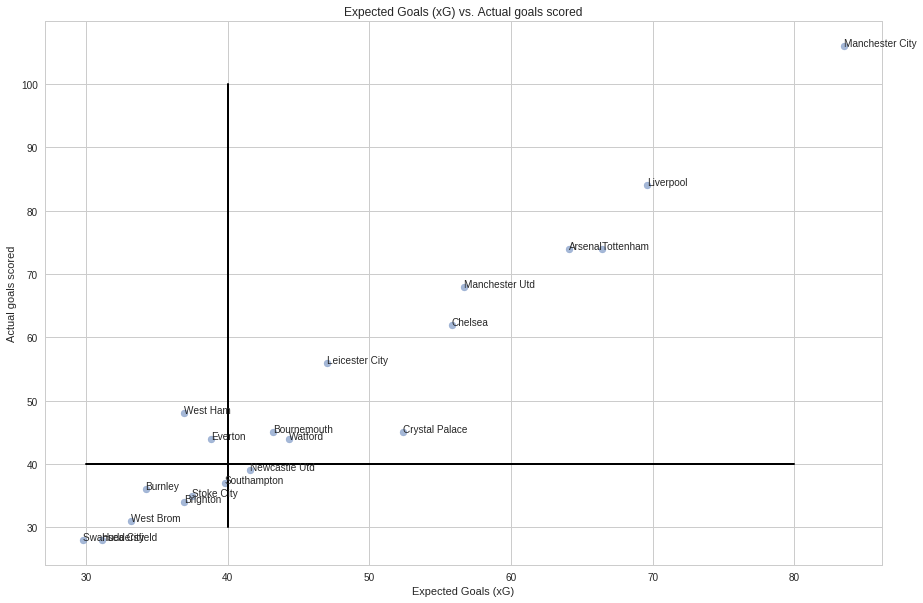

In [165]:
plt.style.use('seaborn-whitegrid')

x = list(xg_gs1['Expected goals (xG)'])
y = list(xg_gs1['Goals scored'])
n = xg_gs1['Team']

plt.figure(figsize = (15, 10))
plt.scatter(x, y, alpha=0.5)
plt.title('Expected Goals (xG) vs. Actual goals scored')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual goals scored')

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

plt.plot([40,40], [30,100], linewidth = 2, color ='black')
plt.plot([30,80], [40,40], linewidth = 2, color ='black')

plt.show()

### Analysis 3

This analysis uses the results dataset (Table 3) to check just how many points are won by scoring a certain amount of goals, both for home and away teams. Since we have the results of all games for the entirety of the 11 seasons, we have sufficient sample size to conclude that scoring a certain amount of goals would guarantee a certain amount of points.

Essentially, we are checking how much of an advantage a home team has over the away team.


In [166]:
df = season_results_data.copy()

columns = ['Home Team Points', 'Away Team Points']

for col in columns:
  df[col] = np.full_like(df.index, np.nan, dtype=np.double)

for idx, row in enumerate(df.iterrows()):

  if row[1]['Result'] == 'D':
    
    df['Home Team Points'][idx] = 1
    df['Away Team Points'][idx] = 1

  elif row[1]['Result'] == 'H':

    df['Home Team Points'][idx] = 3
    df['Away Team Points'][idx] = 0

  else:

    df['Home Team Points'][idx] = 0
    df['Away Team Points'][idx] = 3

df

,Home Team,Away Team,Home Goals,Away Goals,Result,Season,Home Team Points,Away Team Points
0,Sunderland,Tottenham Hotspur,1.0,0.0,H,2007-2008,3.0,0.0
1,Bolton Wanderers,Newcastle United,1.0,3.0,A,2007-2008,0.0,3.0
2,Derby County,Portsmouth,2.0,2.0,D,2007-2008,1.0,1.0
3,Everton,Wigan Athletic,2.0,1.0,H,2007-2008,3.0,0.0
4,Middlesbrough,Blackburn Rovers,1.0,2.0,A,2007-2008,0.0,3.0
...,...,...,...,...,...,...,...,...
4175,Newcastle United,Chelsea,3.0,0.0,H,2017-2018,3.0,0.0
4176,Southampton,Manchester City,0.0,1.0,A,2017-2018,0.0,3.0
4177,Swansea City,Stoke City,1.0,2.0,A,2017-2018,0.0,3.0
4178,Tottenham Hotspur,Leicester City,5.0,4.0,H,2017-2018,3.0,0.0


In [167]:
df = pd.get_dummies(df, columns=['Home Goals', 'Away Goals'])

home_greater_than_3 = ['Home Goals_4.0', 'Home Goals_5.0', 'Home Goals_6.0', 'Home Goals_7.0', 'Home Goals_8.0', 'Home Goals_9.0']
away_greater_than_3 = ['Away Goals_4.0', 'Away Goals_5.0', 'Away Goals_6.0', 'Away Goals_7.0']

for idx, col in enumerate(home_greater_than_3):

  if idx == 0:
    df['Home Goals_>3.0'] = df[col]

  else:
    df['Home Goals_>3.0'] += df[col]

for idx, col in enumerate(away_greater_than_3):

  if idx == 0:
    df['Away Goals_>3.0'] = df[col]

  else:
    df['Away Goals_>3.0'] += df[col]

df.drop(columns=home_greater_than_3 + away_greater_than_3, inplace=True)
df

,Home Team,Away Team,Result,Season,Home Team Points,Away Team Points,Home Goals_0.0,Home Goals_1.0,Home Goals_2.0,Home Goals_3.0,Away Goals_0.0,Away Goals_1.0,Away Goals_2.0,Away Goals_3.0,Home Goals_>3.0,Away Goals_>3.0
0,Sunderland,Tottenham Hotspur,H,2007-2008,3.0,0.0,0,1,0,0,1,0,0,0,0,0
1,Bolton Wanderers,Newcastle United,A,2007-2008,0.0,3.0,0,1,0,0,0,0,0,1,0,0
2,Derby County,Portsmouth,D,2007-2008,1.0,1.0,0,0,1,0,0,0,1,0,0,0
3,Everton,Wigan Athletic,H,2007-2008,3.0,0.0,0,0,1,0,0,1,0,0,0,0
4,Middlesbrough,Blackburn Rovers,A,2007-2008,0.0,3.0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,Newcastle United,Chelsea,H,2017-2018,3.0,0.0,0,0,0,1,1,0,0,0,0,0
4176,Southampton,Manchester City,A,2017-2018,0.0,3.0,1,0,0,0,0,1,0,0,0,0
4177,Swansea City,Stoke City,A,2017-2018,0.0,3.0,0,1,0,0,0,0,1,0,0,0
4178,Tottenham Hotspur,Leicester City,H,2017-2018,3.0,0.0,0,0,0,0,0,0,0,0,1,1


#### Visualizations

The below two graphs showcase the relationship between number of goals scored and points won. Essentially, we want to check the number of goals needed for a home or away team to secure a win or a draw. Conversely, we also check the effect of conceding a certain number of goals on points won or lost.

For home teams, as we can see, conceding 0 goals (that is, keeping a clean sheet) practically guarantees them a win (over 2.5 points). Even conceding 1 gets them a draw at the very least, maybe even a win on a lot of occasions (still get over 1.5 points). However, if they concede more than that, they are more likely to lose as the average falls sharply below 1 point. Scoring even a single goal also guarantees them a draw at the very least, while scoring 2 goals means they are likely to secure a win (nearly 2.5 points).

On the other hand, for the away teams, they are required to work harder for wins or even to draw games. Keeping a clean sheet gets the away team below 2.5 points, whereas if they concede even a single goal, securing a win becomes harder, as the average points gets closer to just 1 (a draw). Even scoring a single goal does not give them as much of chance of winning as it did for the home team (average points won stands below 1, quite less as compared to the home team).

To conclude, home teams have a massive advantage over the away teams and can capitalize on that factor to secure more wins.

##### Home Team Visualization [4]

Text(0, 0.5, 'Average Points per Goal')

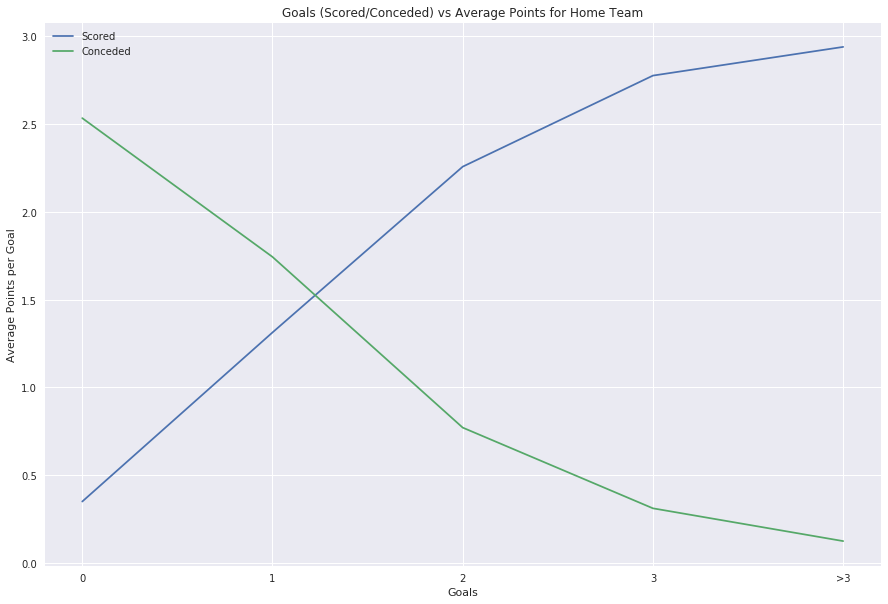

In [168]:
sns.set_style("darkgrid")

scored_average_points = {'0':average(df[df['Home Goals_0.0']==1]['Home Team Points']), '1':average(df[df['Home Goals_1.0']==1]['Home Team Points']), '2':average(df[df['Home Goals_2.0']==1]['Home Team Points']), '3':average(df[df['Home Goals_3.0']==1]['Home Team Points']), '>3':average(df[df['Home Goals_>3.0']==1]['Home Team Points'])}
conceded_average_points = {'0':average(df[df['Away Goals_0.0']==1]['Home Team Points']), '1':average(df[df['Away Goals_1.0']==1]['Home Team Points']), '2':average(df[df['Away Goals_2.0']==1]['Home Team Points']), '3':average(df[df['Away Goals_3.0']==1]['Home Team Points']), '>3':average(df[df['Away Goals_>3.0']==1]['Home Team Points'])}

plt.figure(figsize=(15,10))
ax = sns.lineplot(list(scored_average_points.keys()), list(scored_average_points.values()), label='Scored')
sns.lineplot(list(conceded_average_points.keys()), list(conceded_average_points.values()), label='Conceded')
ax.set_title("Goals (Scored/Conceded) vs Average Points for Home Team")
ax.set_xlabel("Goals")
ax.set_ylabel("Average Points per Goal")

##### Away Team Visualization [5]

Text(0, 0.5, 'Average Points per Goal')

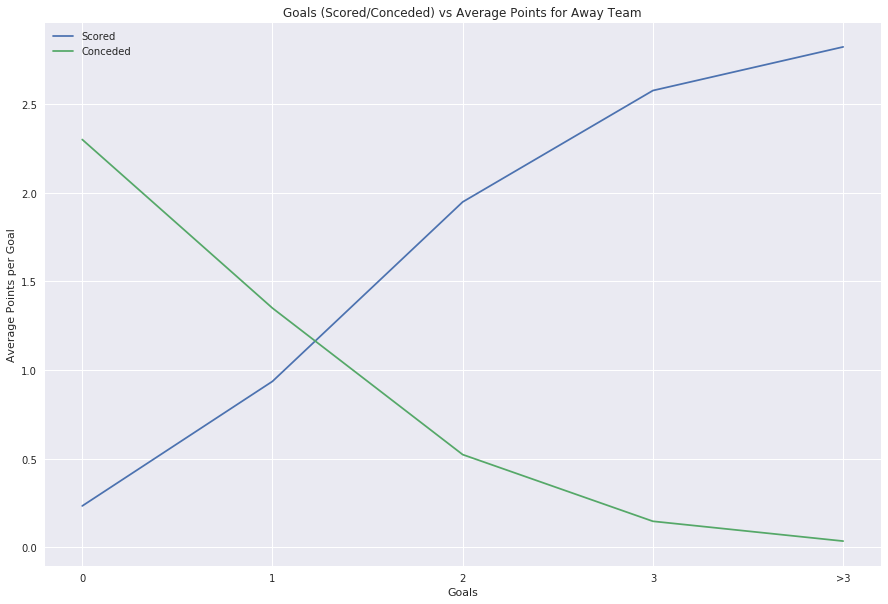

In [169]:
conceded_average_points = {'0':average(df[df['Home Goals_0.0']==1]['Away Team Points']), '1':average(df[df['Home Goals_1.0']==1]['Away Team Points']), '2':average(df[df['Home Goals_2.0']==1]['Away Team Points']), '3':average(df[df['Home Goals_3.0']==1]['Away Team Points']), '>3':average(df[df['Home Goals_>3.0']==1]['Away Team Points'])}
scored_average_points = {'0':average(df[df['Away Goals_0.0']==1]['Away Team Points']), '1':average(df[df['Away Goals_1.0']==1]['Away Team Points']), '2':average(df[df['Away Goals_2.0']==1]['Away Team Points']), '3':average(df[df['Away Goals_3.0']==1]['Away Team Points']), '>3':average(df[df['Away Goals_>3.0']==1]['Away Team Points'])}

plt.figure(figsize=(15,10))
ax = sns.lineplot(list(scored_average_points.keys()), list(scored_average_points.values()), label='Scored')
sns.lineplot(list(conceded_average_points.keys()), list(conceded_average_points.values()), label='Conceded')
ax.set_title("Goals (Scored/Conceded) vs Average Points for Away Team")
ax.set_xlabel("Goals")
ax.set_ylabel("Average Points per Goal")

### Analysis 4 with Visualization [6]

Here, we have a graph highlighting by how many goals a team at a particular position wins their matches on average.

For eg, the champions win their games by over a 2 goal margin on average throughout the season. Similarly, the bottom most team usually loses their games by at least a 1.5 goal margin.

Once again, we can see the difference between the good and the bad teams over the course of a season

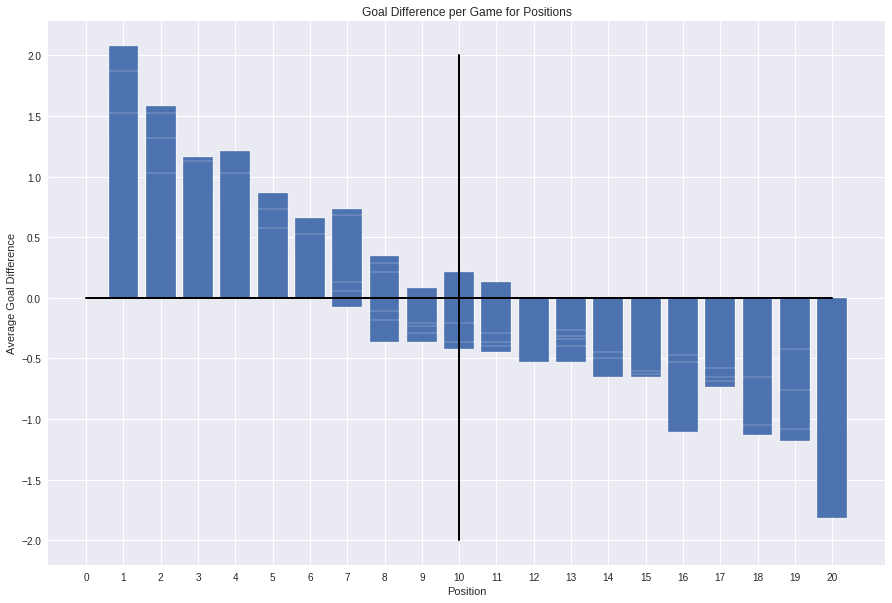

In [170]:
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize = (15, 10))
plt.bar([i%20+1 for i in range(0,220)], epl_seasons_data['Goal difference']/38)
plt.xticks(np.arange(0, 21, step=1))

plt.plot([10,10], [-2,2], linewidth = 2, color ='black')
plt.plot([0,20], [0,0], linewidth = 2, color ='black')

plt.xlabel('Position')
plt.ylabel('Average Goal Difference')
plt.title('Goal Difference per Game for Positions')

plt.show()

### Analysis 5

Below questions are what we are looking to answer in this analysis.

- Have the standards/performances of the top teams improved? In other words, are the top 4 teams in any particular season getting more points than what they used to over 10 years?

- How has the required points total for survival/winning the league changed? Do teams need more points to either win the title or escape relegation or achieve UCL status?

- Are good teams becoming better or are the bad ones becoming worse?

In [0]:
points_data = defaultdict(list)

for row in epl_seasons_data.iterrows():
  points_data[row[0][0]].append(row[1]['Points'])

In [172]:
points_data = pd.DataFrame(points_data)
points_data = points_data.T
points_data.columns = [i for i in range(1,21)]
points_data.sort_index(inplace=True)
points_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2007-2008,87,85,83,76,65,60,58,57,55,49,46,43,42,40,39,37,36,36,35,11
2008-2009,90,86,83,72,63,62,53,51,51,50,45,45,41,41,41,36,35,34,32,32
2009-2010,86,85,75,70,67,64,63,61,50,50,47,46,44,39,38,36,35,30,30,19
2010-2011,80,71,71,68,62,58,54,49,48,47,47,46,46,46,43,42,40,39,39,33
2011-2012,89,89,70,69,65,64,56,52,52,47,47,47,45,45,43,38,37,36,31,25
2012-2013,89,78,75,73,72,63,61,49,46,46,44,43,42,41,41,41,39,36,28,25
2013-2014,86,84,82,79,72,69,64,56,50,49,45,42,40,38,38,37,36,33,32,30
2014-2015,87,79,75,70,64,62,60,56,54,48,47,47,44,41,39,38,38,35,33,30
2015-2016,81,71,70,66,66,63,62,60,51,50,47,47,45,43,42,42,39,37,34,17
2016-2017,93,86,78,76,75,69,61,46,46,45,45,44,44,41,41,40,40,34,28,24


#### Visualization [7]

The below viz. shows the trend of total points won by teams in the 11 seasons in our dataset, distributed on the basis of their positions. The trendline shows the degree at which teams finishing at a particular position have improved between the seasons 2007-08 and 2017-18.

So, say for position 1, the distribution of points is shown in the first block, all of whose points lie above the 80 point mark and the trendline suggests that teams need more points to be champions now than they needed before.

It also shows that the top 4 teams have improved at a much higher rate than the teams below them.

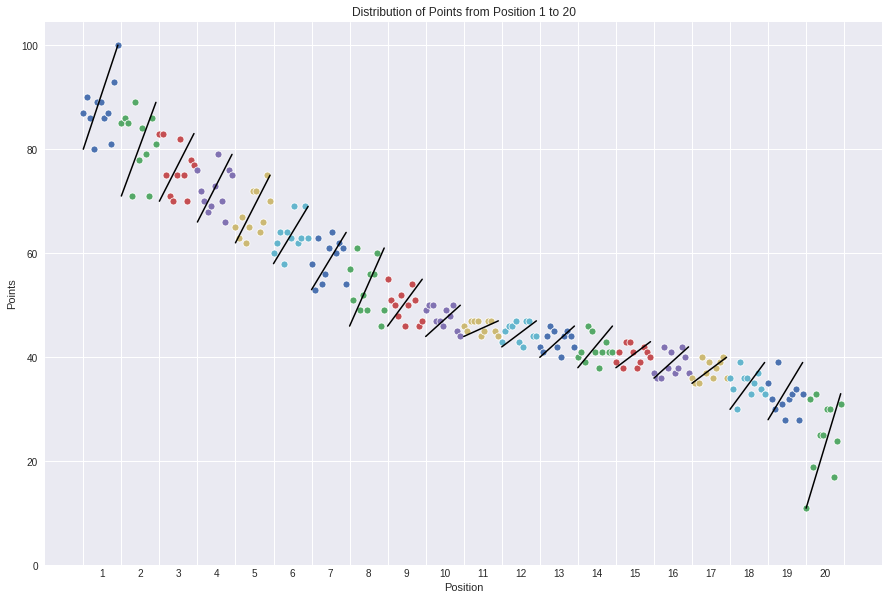

In [173]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize = (15, 10))

for i in range(0, 20):

  sns.scatterplot([i+(j/11) for j in range(0,11)], points_data[i+1])
  plt.plot([i+(0/11), i+(10/11)], [points_data[i+1].min(), points_data[i+1].max()], color='black', linewidth=1.5)

plt.xticks(np.arange(0, 21, step=1))
plt.yticks(np.arange(0, 120, step=20))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_locator(ticker.FixedLocator([(i+1)/2 for i in range(0,40)]))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter([str(i) for i in range(1,22)]))

plt.ylabel('Points')
plt.xlabel('Position')
plt.title('Distribution of Points from Position 1 to 20')

plt.xticks(rotation = 'vertical')
plt.show()

## Section 5: Conclusion

We analyzed -
- the offensive and defensive performances of top and lower level teams
- the over/under performance of teams in terms of goalscoring
- margins by which teams finishing at a certain position win or lose their games
- home team advantages
- rate of improvement of teams over the last 11 seasons

Based on that, we can conclude that good teams outdo others by attacking and defending on a much better level.

They clearly overperform their expected metrics as well, meaning they are extremely efficient at executing their on-ball activities (such as passing, shooting, etc.).

The good teams also win most of their games, by an average margin of over 1 goal per game, which means scoring more guarantees more wins and consequently, more points.

Finally, the last visualization [7], encapsulates what we are trying to find; whether good teams are becoming better or poorer teams are becoming worse. The answer we found are a bit surprising, because as we can see, all teams have improved over the years. With one major difference; the good teams have improved at a much higher rate than others (we can deduce this by checking the slope of each trendline). The rate of improvement is what the poorer teams are not able to match. This also tells us that to win the league or to finish in the top 4 positions or to escape relegation, teams need more points that they used to.